# **Proyecto de validación de calificaciones**

## Talento Tech - Módulo de Inteligencia Artificial/Básico
## *Elaborado por José Daniel Ayala Barrera*
### Abril 2024

# **Importamos** **librerias**.


In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import glob # El módulo glob, que es la abreviatura de global, es una función que se utiliza para buscar archivos que coincidan con un patrón o nombre de archivo
            # específico. Puede utilizarse para buscar archivos xlsx, csv, txt y también para buscar un determinado texto en un lote de archivos.
import matplotlib.pyplot as plt

Para garantizar persistencia en la carga y lectura de los archivos, clonamos los mismos desde mi repositorio de github

In [138]:
!git clone https://github.com/danielxxi/TalentoTech.git

fatal: destination path 'TalentoTech' already exists and is not an empty directory.


Utilizamos siempre rutas absolutas para especificar la ruta de la carpeta para evitar cualquier confusión con respecto al directorio de trabajo. Acá, hacemos uso del módulo *os* para que las rutas sean independientes de la plataforma:



In [139]:
path = os.path.abspath('/content/TalentoTech') # definimos path

Una vez que hemos definido la ruta de los archivos de Excel, procedemos a usar la librería *pandas* para importar los archivos a los dataframes pandas de Python. Utilizaremos un bucle for para recorrer todos los archivos Excel del directorio e importarlos a pandas. Como buena práctica, implementamos un módulo de gestión de errores para anticiparnos a l posibles. Acá, usamos bloques **try** y **except** para gestionar posibles errores al leer archivos de Excel.

In [140]:
all_files = glob.glob(path + "/*.xlsx") # Definimos búsqueda de archivos xlsx
li = []
for filename in all_files:
    try: # Bloque de manejo de errores
        df = pd.read_excel(filename, index_col=None, header=1, usecols='D, G:I, M') # obviamos el primer registro (encabezado) y traemos columnas deforma específica
        li.append(df)
    except Exception as e:
        print(f"Error leyendo {filename}: {e}")

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Ahora concatenamos todos los archivos de Excel en un dataframe consolidado utilizando la biblioteca *pandas*. Usaremos la función concat() para concatenar todos los dataframes de la lista 'li' en un dataframe.

In [141]:
df_califica = pd.concat(li, axis=0, ignore_index=True)

# **Análisis Exploratorio de Datos (EDA)**

In [142]:
row_count_concat = len(df_califica)

print(f'los 4 DataFrames concatenados tienen, en total,  {row_count_concat} registros.')

los 4 DataFrames concatenados tienen, en total,  2123 registros.


In [143]:
df_califica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Nombre completo                  2123 non-null   object        
 1   Dirección de correo electrónico  2123 non-null   object        
 2   Tareas                           2123 non-null   object        
 3   Fecha de vencimiento             2123 non-null   datetime64[ns]
 4   Puntos                           155 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 83.1+ KB


In [109]:
#df_califica = df_califica.convert_dtypes() # ajustamos los tipos de datos del dataframe

In [144]:
print(df_califica.shape)

(2123, 5)


In [145]:
df_califica.head(5)

,Nombre completo,Dirección de correo electrónico,Tareas,Fecha de vencimiento,Puntos
0,Michell Nicolas Riveros Ramirez,mnriveros_soy.sena.edu.co#EXT#@sena4.onmicroso...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN
1,David Andres Barrera Ochoa,dabarrera8_soy.sena.edu.co#EXT#@sena4.onmicros...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN
2,Jesus David Aguilar Daza,jdaguilar56_soy.sena.edu.co#EXT#@sena4.onmicro...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN
3,Edwin Fernando Calle Calle,edwinf_calle_soy.sena.edu.co#EXT#@sena4.onmicr...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN
4,Jimena Gallego Garcia,jimena.gallego_soy.sena.edu.co#EXT#@sena4.onmi...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN


In [146]:
df_califica.tail(5) #leemos últimos 5 registros

,Nombre completo,Dirección de correo electrónico,Tareas,Fecha de vencimiento,Puntos
2118,delzombiejj,delzombiejj_gmail.com#EXT#@sena4.onmicrosoft.com,RAP_27_ GA3_AA2_EV02_RG_Audio,2024-03-31,NaN
2119,Alemoxis,Alemoxis_outlook.es#EXT#@sena4.onmicrosoft.com,RAP_27_ GA3_AA2_EV02_RG_Audio,2024-03-31,NaN
2120,castrom,castrom_ucentral.edu.co#EXT#@sena4.onmicrosoft...,RAP_27_ GA3_AA2_EV02_RG_Audio,2024-03-31,NaN
2121,andrescabrales79,andrescabrales79_gmail.com#EXT#@sena4.onmicros...,RAP_27_ GA3_AA2_EV02_RG_Audio,2024-03-31,NaN
2122,andreapr822,andreapr822_gmail.com#EXT#@sena4.onmicrosoft.com,RAP_27_ GA3_AA2_EV02_RG_Audio,2024-03-31,NaN


In [147]:
df_califica.dtypes.value_counts()

object            3
datetime64[ns]    1
float64           1
Name: count, dtype: int64

**Limpieza del dataset:**

*   Eliminar datos faltantes
*   Eliminar registros repetidos










In [149]:
df_califica.isna().sum()

Nombre completo                       0
Dirección de correo electrónico       0
Tareas                                0
Fecha de vencimiento                  0
Puntos                             1968
dtype: int64

Graficamos dataframa con valores NaN. Vemos que la característica "Puntos" posee la mayor cantidad de eventos con valores de este tipo.

Para esto usamos librería seaborn (sns) y funciones lambda

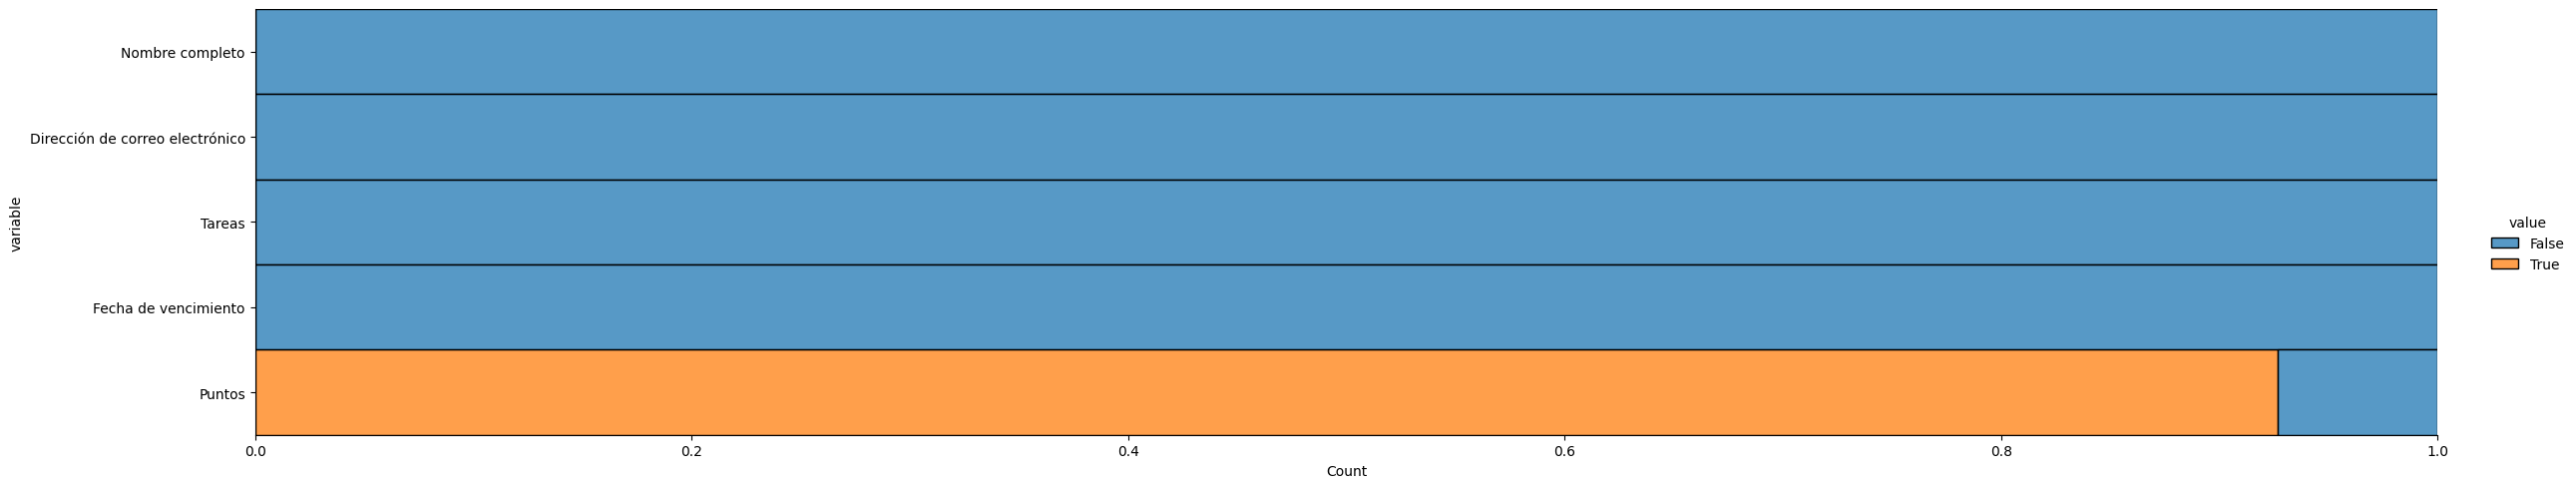

In [148]:
df_califica.isnull().melt().pipe(lambda df:
                                 sns.displot(data=df, y='variable',
                                             hue='value',
                                             multiple='fill', aspect=5))


<Axes: >

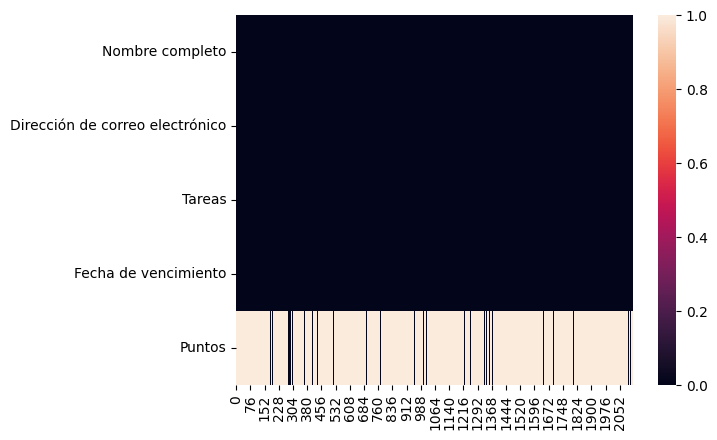

In [150]:
df_califica.isnull().transpose().pipe(lambda df:(sns.heatmap(data=df)))

In [151]:
df_califica.head()

,Nombre completo,Dirección de correo electrónico,Tareas,Fecha de vencimiento,Puntos
0,Michell Nicolas Riveros Ramirez,mnriveros_soy.sena.edu.co#EXT#@sena4.onmicroso...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN
1,David Andres Barrera Ochoa,dabarrera8_soy.sena.edu.co#EXT#@sena4.onmicros...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN
2,Jesus David Aguilar Daza,jdaguilar56_soy.sena.edu.co#EXT#@sena4.onmicro...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN
3,Edwin Fernando Calle Calle,edwinf_calle_soy.sena.edu.co#EXT#@sena4.onmicr...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN
4,Jimena Gallego Garcia,jimena.gallego_soy.sena.edu.co#EXT#@sena4.onmi...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,NaN


In [152]:
df_califica = df_califica.fillna(0) # reemplazamos valor nulos o NaN por cero

In [153]:
df_califica.head()

,Nombre completo,Dirección de correo electrónico,Tareas,Fecha de vencimiento,Puntos
0,Michell Nicolas Riveros Ramirez,mnriveros_soy.sena.edu.co#EXT#@sena4.onmicroso...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0
1,David Andres Barrera Ochoa,dabarrera8_soy.sena.edu.co#EXT#@sena4.onmicros...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0
2,Jesus David Aguilar Daza,jdaguilar56_soy.sena.edu.co#EXT#@sena4.onmicro...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0
3,Edwin Fernando Calle Calle,edwinf_calle_soy.sena.edu.co#EXT#@sena4.onmicr...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0
4,Jimena Gallego Garcia,jimena.gallego_soy.sena.edu.co#EXT#@sena4.onmi...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0


In [154]:
df_califica.isnull()

,Nombre completo,Dirección de correo electrónico,Tareas,Fecha de vencimiento,Puntos
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2118,False,False,False,False,False
2119,False,False,False,False,False
2120,False,False,False,False,False
2121,False,False,False,False,False


In [155]:
df_califica.isnull().any()

Nombre completo                    False
Dirección de correo electrónico    False
Tareas                             False
Fecha de vencimiento               False
Puntos                             False
dtype: bool

In [157]:
# Eliminar registros repetidos o duplicados
df_califica = df_califica.drop_duplicates()

In [158]:
print(df_califica.shape) # set de datos ajustado a 2109 registros no duplicados

(2109, 5)


In [156]:
df_califica.columns = df_califica.columns.str.replace(' ', '_') #renombramos columnas para mejor manejo con las librerias

In [159]:
df_califica.head(5)

,Nombre_completo,Dirección_de_correo_electrónico,Tareas,Fecha_de_vencimiento,Puntos
0,Michell Nicolas Riveros Ramirez,mnriveros_soy.sena.edu.co#EXT#@sena4.onmicroso...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0
1,David Andres Barrera Ochoa,dabarrera8_soy.sena.edu.co#EXT#@sena4.onmicros...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0
2,Jesus David Aguilar Daza,jdaguilar56_soy.sena.edu.co#EXT#@sena4.onmicro...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0
3,Edwin Fernando Calle Calle,edwinf_calle_soy.sena.edu.co#EXT#@sena4.onmicr...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0
4,Jimena Gallego Garcia,jimena.gallego_soy.sena.edu.co#EXT#@sena4.onmi...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0


Ahor asignamos calificación de acuerdo a los puntos obtenidos:



*   'A' con atributo "Puntos" mayor o igual a 70
*   'D' con atributo "Puntos" menor a 70



In [164]:
df_califica['Calificación'] = np.where(df_califica['Puntos']>= 70, 'A', 'D')

In [165]:
df_califica.head()

,Nombre_completo,Dirección_de_correo_electrónico,Tareas,Fecha_de_vencimiento,Puntos,Calificación
0,Michell Nicolas Riveros Ramirez,mnriveros_soy.sena.edu.co#EXT#@sena4.onmicroso...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,D
1,David Andres Barrera Ochoa,dabarrera8_soy.sena.edu.co#EXT#@sena4.onmicros...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,D
2,Jesus David Aguilar Daza,jdaguilar56_soy.sena.edu.co#EXT#@sena4.onmicro...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,D
3,Edwin Fernando Calle Calle,edwinf_calle_soy.sena.edu.co#EXT#@sena4.onmicr...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,D
4,Jimena Gallego Garcia,jimena.gallego_soy.sena.edu.co#EXT#@sena4.onmi...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,D


In [166]:
df_califica_final = df_califica.groupby(['Nombre_completo', 'Dirección_de_correo_electrónico', 'Tareas','Fecha_de_vencimiento', 'Calificación'])['Nombre_completo'].count()

In [167]:
df_califica_final.columns = ['Nombre_completo', 'Dirección_de_correo_electrónico'	,'Tareas','Fecha_de_vencimiento', 'Calificación', 'Count']

In [168]:
df_califica_final.head()

Nombre_completo  Dirección_de_correo_electrónico                 Tareas                                                                  Fecha_de_vencimiento  Calificación
Alemoxis         Alemoxis_outlook.es#EXT#@sena4.onmicrosoft.com  Entrega de evidencias tardías - Transversal                             2024-05-30            D               1
                                                                 RAP 09 -AA1-EV04 – FG -Maquetación de la interfaz gráfica en HTML de l  2024-04-30            D               1
                                                                 RAP 09 -AA1-EV06 – FG -Nociones de reglas de usabilidad y accesibilida  2024-04-30            D               1
                                                                 RAP 09 _AA1-EV05 _FG _Mapa de navegación                                2024-04-30            D               1
                                                                 RAP 09-AA1-EV01 – DT -Taller sobre construcción del pro

In [169]:
# Convert the Series object to a DataFrame object
df_califica_final = df_califica_final.to_frame()

In [170]:
# Now the user can use the drop() function to delete the last n columns
df_califica_final = df_califica_final.loc[:, df_califica_final.columns[:-1]]


In [171]:
df_califica_final.head()

Empty DataFrame
Columns: []
Index: [(Alemoxis, Alemoxis_outlook.es#EXT#@sena4.onmicrosoft.com, Entrega de evidencias tardías - Transversal, 2024-05-30 00:00:00, D), (Alemoxis, Alemoxis_outlook.es#EXT#@sena4.onmicrosoft.com, RAP 09 -AA1-EV04 – FG -Maquetación de la interfaz gráfica en HTML de l, 2024-04-30 00:00:00, D), (Alemoxis, Alemoxis_outlook.es#EXT#@sena4.onmicrosoft.com, RAP 09 -AA1-EV06 – FG -Nociones de reglas de usabilidad y accesibilida, 2024-04-30 00:00:00, D), (Alemoxis, Alemoxis_outlook.es#EXT#@sena4.onmicrosoft.com, RAP 09 _AA1-EV05 _FG _Mapa de navegación, 2024-04-30 00:00:00, D), (Alemoxis, Alemoxis_outlook.es#EXT#@sena4.onmicrosoft.com, RAP 09-AA1-EV01 – DT -Taller sobre construcción del prototipo del soft, 2024-04-30 00:00:00, D)]

In [172]:
# convert into a df using reset_index() method
df_califica_final = df_califica_final.reset_index()\
.rename(columns = {'index': 'Nombre_completo', 0: 'Dirección_de_correo_electrónico', 1: 'Tareas', 2: 'Fecha_de_vencimiento', 3: 'Calificación'})

In [173]:
# print the data frame and column
print(df.columns)

Index(['Nombre completo', 'Dirección de correo electrónico', 'Tareas',
       'Fecha de vencimiento', 'Puntos'],
      dtype='object')


In [174]:
df_califica_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Nombre_completo                  2109 non-null   object        
 1   Dirección_de_correo_electrónico  2109 non-null   object        
 2   Tareas                           2109 non-null   object        
 3   Fecha_de_vencimiento             2109 non-null   datetime64[ns]
 4   Calificación                     2109 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 82.5+ KB


In [176]:
df_califica_final = df_califica_final.convert_dtypes()

In [178]:
df_califica_final.dtypes

Nombre_completo                    string[python]
Dirección_de_correo_electrónico    string[python]
Tareas                             string[python]
Fecha_de_vencimiento               datetime64[ns]
Calificación                       string[python]
dtype: object

In [179]:
df_califica_final.shape

(2109, 5)

In [180]:
df_califica_final.head()

,Nombre_completo,Dirección_de_correo_electrónico,Tareas,Fecha_de_vencimiento,Calificación
0,Alemoxis,Alemoxis_outlook.es#EXT#@sena4.onmicrosoft.com,Entrega de evidencias tardías - Transversal,2024-05-30,D
1,Alemoxis,Alemoxis_outlook.es#EXT#@sena4.onmicrosoft.com,RAP 09 -AA1-EV04 – FG -Maquetación de la inter...,2024-04-30,D
2,Alemoxis,Alemoxis_outlook.es#EXT#@sena4.onmicrosoft.com,RAP 09 -AA1-EV06 – FG -Nociones de reglas de u...,2024-04-30,D
3,Alemoxis,Alemoxis_outlook.es#EXT#@sena4.onmicrosoft.com,RAP 09 _AA1-EV05 _FG _Mapa de navegación,2024-04-30,D
4,Alemoxis,Alemoxis_outlook.es#EXT#@sena4.onmicrosoft.com,RAP 09-AA1-EV01 – DT -Taller sobre construcció...,2024-04-30,D


In [181]:
df_califica_report = df_califica_final.pivot(index=['Nombre_completo','Dirección_de_correo_electrónico','Fecha_de_vencimiento'], columns='Tareas', values='Calificación')

In [182]:
df_califica_report = df_califica_report.replace(np.nan, ' ')

In [183]:
df_califica_report.head(5)

Tareas                                                                              Entrega de evidencias tardías - Transversal        \
Nombre_completo Dirección_de_correo_electrónico                Fecha_de_vencimiento                                                     
Alemoxis        Alemoxis_outlook.es#EXT#@sena4.onmicrosoft.com 2024-03-31                                                               
                                                               2024-04-01                                                               
                                                               2024-04-14                                                               
                                                               2024-04-26                                                               
                                                               2024-04-27                                                               

Tareas                                                                              RAP 09 -AA1-EV04 - JP -Maquetación de la inter...  \
Nombre_completo Dirección_de_correo_electrónico                Fecha_de_vencimiento                                                     
Alemoxis        Alemoxis_outlook.es#EXT#@sena4.onmicrosoft.com 2024-03-31                                                               
                                                               2024-04-01                                                               
                                                               2024-04-14                                                               
                                                               2024-04-26                                                               
                                                               2024-04-27                                                               

Tareas                                                                              RAP 09 -AA1-EV04 – FG -Maquetación de la inter...  \
Nombre_completo Dirección_de_correo_electrónico                Fecha_de_vencimiento                                                     
Alemoxis        Alemoxis_outlook.es#EXT#@sena4.onmicrosoft.com 2024-03-31                                                               
                                                               2024-04-01                                                               
                                                               2024-04-14                                                               
                                                               2024-04-26                                                               
                                                               2024-04-27                                                               

Tareas                                                                              RAP 09 -AA1-EV04 – JP -Maquetación de la inter...  \
Nombre_completo Dirección_de_correo_electrónico                Fecha_de_vencimiento                                                     
Alemoxis        Alemoxis_outlook.es#EXT#@sena4.onmicrosoft.com 2024-03-31                                                               
                                                               2024-04-01                                                               
                                                               2024-04-14                                                               
                                                               2024-04-26                                                               
                                                               2024-04-27                                                               

Tareas                                                                              RAP 09 -AA1-EV04 – JP -Maquetación de la inter...  \
Nombre_completo Direcci

# Ahora vamos a hacer el mismo ejercicio, pero con un solo archivo

In [120]:
# importar los datos
df_califica_1=pd.read_excel(path + "/Calificaciones de 2758313 ADSO 21_04_2024, 16 31.xlsx", header=1, usecols='D, G:I, M') # obviamos el primer registro (encabezado) y traemos columnas deforma específica

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [121]:
row_count1 = len(df_califica_1)

print(f'El primer DataFrame tiene {row_count1} registros.')

El primer DataFrame tiene 563 registros.


In [122]:
df_califica_1.columns = df_califica_1.columns.str.replace(' ', '_')

In [123]:
df_califica_1 = df_califica_1.fillna(0)

In [124]:
df_califica_1.head()

,Nombre_completo,Dirección_de_correo_electrónico,Tareas,Fecha_de_vencimiento,Puntos
0,Michell Nicolas Riveros Ramirez,mnriveros_soy.sena.edu.co#EXT#@sena4.onmicroso...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0
1,David Andres Barrera Ochoa,dabarrera8_soy.sena.edu.co#EXT#@sena4.onmicros...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0
2,Jesus David Aguilar Daza,jdaguilar56_soy.sena.edu.co#EXT#@sena4.onmicro...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0
3,Edwin Fernando Calle Calle,edwinf_calle_soy.sena.edu.co#EXT#@sena4.onmicr...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0
4,Jimena Gallego Garcia,jimena.gallego_soy.sena.edu.co#EXT#@sena4.onmi...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0


In [125]:
df_califica_1['Calificación'] = np.where(df_califica_1['Puntos']>= 70, 'A', 'D')

In [126]:
df_califica_1.head()

,Nombre_completo,Dirección_de_correo_electrónico,Tareas,Fecha_de_vencimiento,Puntos,Calificación
0,Michell Nicolas Riveros Ramirez,mnriveros_soy.sena.edu.co#EXT#@sena4.onmicroso...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,D
1,David Andres Barrera Ochoa,dabarrera8_soy.sena.edu.co#EXT#@sena4.onmicros...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,D
2,Jesus David Aguilar Daza,jdaguilar56_soy.sena.edu.co#EXT#@sena4.onmicro...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,D
3,Edwin Fernando Calle Calle,edwinf_calle_soy.sena.edu.co#EXT#@sena4.onmicr...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,D
4,Jimena Gallego Garcia,jimena.gallego_soy.sena.edu.co#EXT#@sena4.onmi...,RAP 27_GA6_AA1_EV01_RG_Front End Showcase,2024-07-01,0.0,D


In [128]:
df_califica_1_final = df_califica_1.groupby(['Nombre_completo', 'Dirección_de_correo_electrónico', 'Tareas','Fecha_de_vencimiento', 'Calificación'])['Nombre_completo'].count()

In [129]:
df_califica_1_final.columns = ['Nombre_completo', 'Dirección_de_correo_electrónico'	,'Tareas','Fecha_de_vencimiento', 'Calificación', 'Count']

In [130]:
df_califica_1_final = df_califica_1_final.to_frame()

In [131]:
df_califica_1_final = df_califica_1_final.loc[:, df_califica_1_final.columns[:-1]]

In [132]:
df_califica_1_final = df_califica_1_final.reset_index()\
.rename(columns = {'index': 'Nombre_completo', 0: 'Dirección_de_correo_electrónico', 1: 'Tareas', 2: 'Fecha_de_vencimiento', 3: 'Calificación'})

In [133]:
df_califica_1_final = df_califica_1_final.convert_dtypes()

In [134]:
df_califica_1_report = df_califica_1_final.pivot(index=['Nombre_completo','Dirección_de_correo_electrónico','Fecha_de_vencimiento'], columns='Tareas', values='Calificación')

In [135]:
df_califica_1_report = df_califica_1_report.replace(np.nan, ' ')

In [136]:
df_califica_1_report.head()

Tareas                                                                                               Entrega de evidencias tardías - Transversal        \
Nombre_completo               Dirección_de_correo_electrónico                   Fecha_de_vencimiento                                                     
Carlos Alberto Gonzalez Ortiz cagonzalez3649_soy.sena.edu.co#EXT#@sena4.onmi... 2024-03-31                                                               
                                                                                2024-04-01                                                               
                                                                                2024-04-26                                                               
                                                                                2024-04-30                                                               
                                                                                2024-05-30                                                           D   

Tareas                                                                                               RAP 09 -AA1-EV04 – JP -Maquetación de la inter...  \
Nombre_completo               Dirección_de_correo_electrónico                   Fecha_de_vencimiento                                                     
Carlos Alberto Gonzalez Ortiz cagonzalez3649_soy.sena.edu.co#EXT#@sena4.onmi... 2024-03-31                                                               
                                                                                2024-04-01                                                               
                                                                                2024-04-26                                                               
                                                                                2024-04-30                                                           D   
                                                                                2024-05-30                                                               

Tareas                                                                                               RAP 09 -AA1-EV05 – DT -Mapa de navegación          \
Nombre_completo               Dirección_de_correo_electrónico                   Fecha_de_vencimiento                                                     
Carlos Alberto Gonzalez Ortiz cagonzalez3649_soy.sena.edu.co#EXT#@sena4.onmi... 2024-03-31                                                               
                                                                                2024-04-01                                                               
                                                                                2024-04-26                                                               
                                                                                2024-04-30                                                           A   
                                                                                2024-05-30                                                               

Tareas                                                                                               RAP 09 -AA1-EV06 – JP -Nociones de reglas de u...  \
Nombre_completo               Dirección_de_correo_electrónico                   Fecha_de_vencimiento                                                     
Carlos Alberto Gonzalez Ortiz cagonzalez3649_soy.sena.edu.co#EXT#@sena4.onmi... 2024-03-31                                                               
                                                                                2024-04-01                                                               
                                                                                2024-04-26                                                         